In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

from sklearn.ensemble import RandomForestClassifier
import joblib

In [5]:
# Load featured data
DATA_PATH = "../../data/cleaned-data.csv"
df = pd.read_csv(DATA_PATH)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [6]:
# Dataset Info
print("Shape:", df.shape)
df.info()

Shape: (3630, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance	                     3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nacionality                                     3630 non-null   int64  
 8   Mother's qualification                          3630 non-null   int64  
 9   Father's qualification 

In [7]:
# Prepare Features and Target
target_col = "Target"

X = df.drop(columns=[target_col])
y = df[target_col]

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y   # important for class balance
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (2722, 36)
Test size: (908, 36)


In [9]:
# Pipeline (Scaler + Model)
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(random_state=42))
])

In [10]:
# Hyperparameter Grid 
param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
}

In [11]:
# Grid Search CV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

In [12]:
# Train model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [13]:
# Best Model & Best Parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:\n", best_params)

Best Parameters:
 {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 100}


In [14]:
# Cross-Validation Results Analysis
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.414831,0.019428,0.057568,0.007834,None,2,100,"{'model__max_depth': None, 'model__min_samples...",0.878899,0.911927,0.911765,0.895221,0.913603,0.902283,0.013474,18
1,2.847450,0.078175,0.103344,0.006049,None,2,200,"{'model__max_depth': None, 'model__min_samples...",0.886239,0.906422,0.913603,0.904412,0.917279,0.905591,0.010746,8
2,4.129752,0.074897,0.159314,0.011869,None,2,300,"{'model__max_depth': None, 'model__min_samples...",0.884404,0.902752,0.911765,0.906250,0.917279,0.904490,0.011190,11
3,1.389043,0.042734,0.059568,0.008352,None,5,100,"{'model__max_depth': None, 'model__min_samples...",0.888073,0.908257,0.911765,0.909926,0.922794,0.908163,0.011258,1
4,3.258028,0.730331,0.225677,0.092973,None,5,200,"{'model__max_depth': None, 'model__min_samples...",0.882569,0.906422,0.909926,0.900735,0.922794,0.904489,0.013137,12


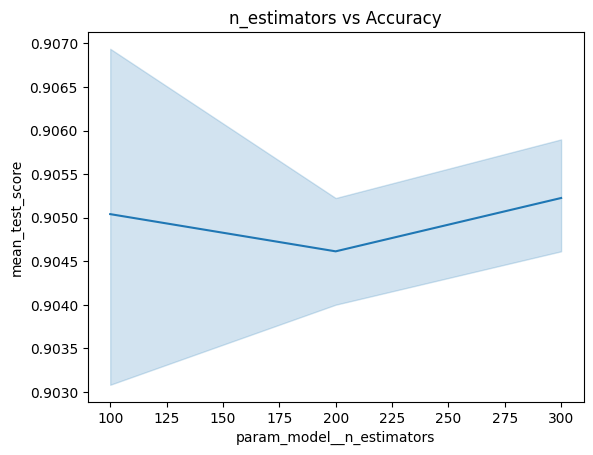

In [15]:
# Plotting n_estimators vs Accuracy
plt.figure()
sns.lineplot(
    data=cv_results,
    x="param_model__n_estimators",
    y="mean_test_score"
)
plt.title("n_estimators vs Accuracy")
plt.show()

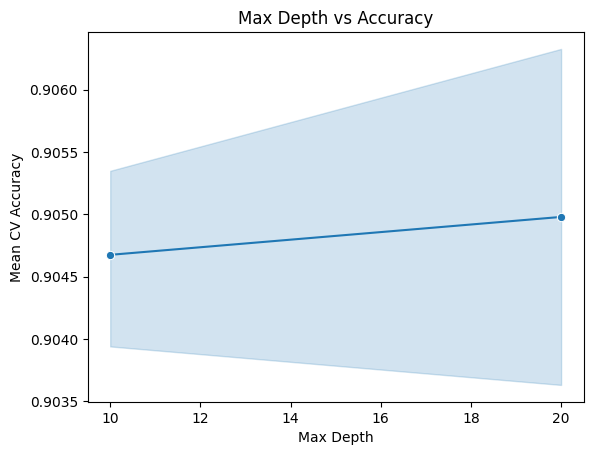

In [20]:
# max_depth vs Accuracy
plt.figure()
sns.lineplot(
    data=cv_results,
    x="param_model__max_depth",
    y="mean_test_score",
    marker="o"
)
plt.title("Max Depth vs Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Mean CV Accuracy")
plt.show()

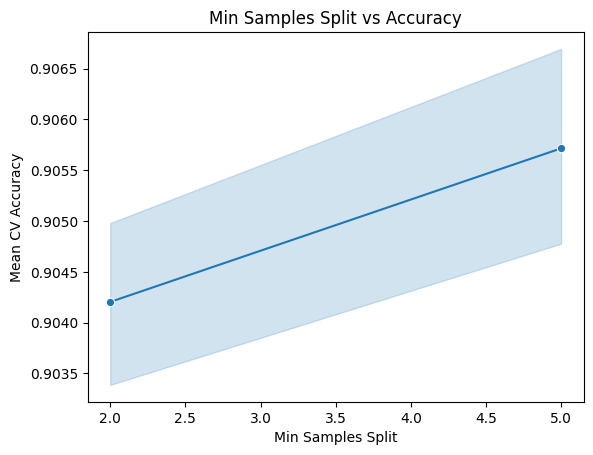

In [21]:
# min_samples_split vs Accuracy
plt.figure()
sns.lineplot(
    data=cv_results,
    x="param_model__min_samples_split",
    y="mean_test_score",
    marker="o"
)
plt.title("Min Samples Split vs Accuracy")
plt.xlabel("Min Samples Split")
plt.ylabel("Mean CV Accuracy")
plt.show()

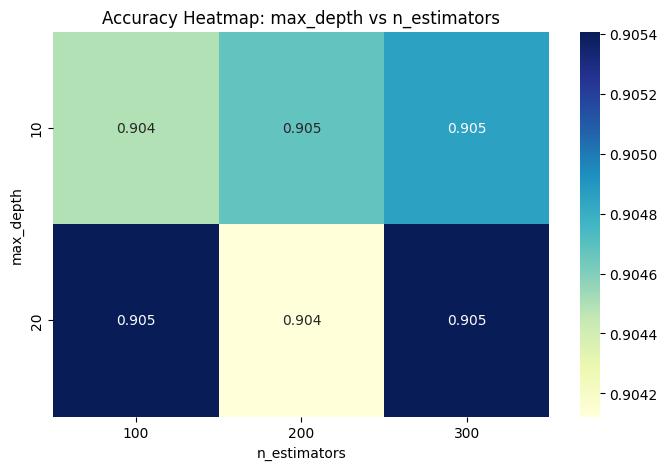

In [22]:
# Heatmap: max_depth vs n_estimators
pivot_table = cv_results.pivot_table(
    values="mean_test_score",
    index="param_model__max_depth",
    columns="param_model__n_estimators"
)

plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Accuracy Heatmap: max_depth vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()

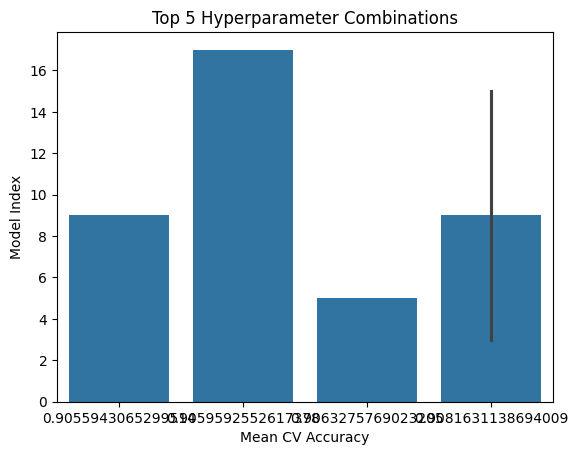

In [23]:
# best vs worst model comparison
top_models = cv_results.sort_values(
    by="mean_test_score",
    ascending=False
).head(5)

plt.figure()
sns.barplot(
    data=top_models,
    x="mean_test_score",
    y=top_models.index
)
plt.title("Top 5 Hyperparameter Combinations")
plt.xlabel("Mean CV Accuracy")
plt.ylabel("Model Index")
plt.show()

In [16]:
# Evaluate on Test Set
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9118942731277533

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       355
           1       0.89      0.98      0.93       553

    accuracy                           0.91       908
   macro avg       0.92      0.89      0.90       908
weighted avg       0.92      0.91      0.91       908



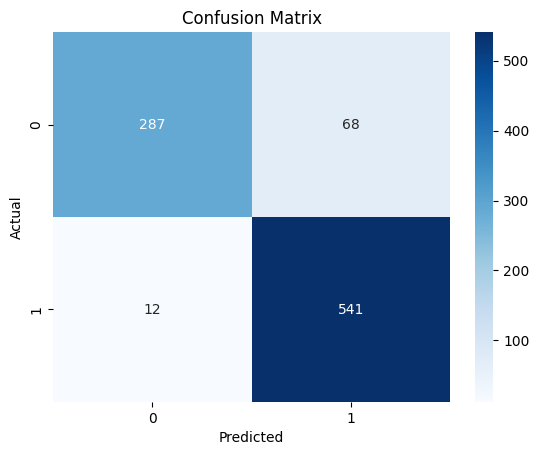

In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Save the test data
joblib.dump(X_test, "../../models & test data/random-forest-X_test.pkl")
joblib.dump(y_test, "../../models & test data/random-forest-y_test.pkl")

['../../models/y_test.pkl']

In [ ]:
# Save the best model
joblib.dump(best_model, "../../models & test data/random-forest-model.pkl")

['../../models/random-forest-model.pkl']